### Complexes

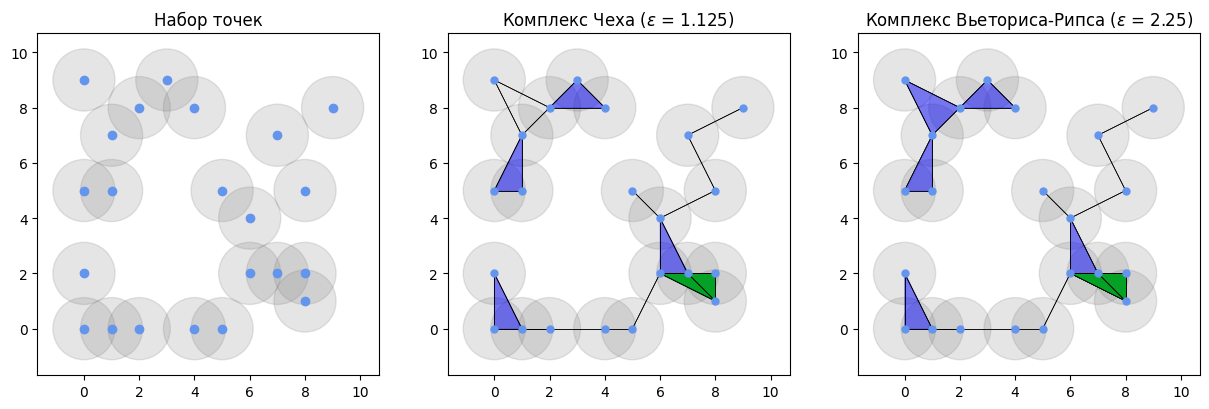

In [2]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Набор точек')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Комплекс Чеха ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Комплекс Вьеториса-Рипса ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"complexes/complexes.svg")
fig.savefig(f"complexes/complexes.png")

### Point clouds

In [3]:
import numpy
import gtda.plotting
import gtda.time_series

x = numpy.linspace(0, 50, 1000)
y = (numpy.cos(x) + numpy.sin(numpy.pi / 2 * x))

embedding = gtda.time_series.SingleTakensEmbedding(parameters_type="fixed", dimension = 3, time_delay = 16, stride = 3)
pc = embedding.fit_transform(y)
pc = pc @ numpy.array([
    [ numpy.cos(-numpy.pi / 2), -numpy.sin(-numpy.pi / 2), 0 ],
    [ numpy.sin(-numpy.pi / 2), numpy.cos(-numpy.pi / 2), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)
fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'yaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'zaxis': { 'nticks': 0, 'range': [ -3, 3 ] }
    }
)
display(fig)
fig.write_image(file = f"point_clouds/1.svg", format = "svg")

In [4]:
x = numpy.linspace(0, 50, 1000)
y = numpy.cosh(numpy.cos(numpy.pi / 2 * x) + numpy.sin(x))

pc = embedding.fit_transform(y)
alpha = numpy.pi
pc = pc @ numpy.array([
    [ numpy.cos(alpha), -numpy.sin(alpha), 0 ],
    [ numpy.sin(alpha), numpy.cos(alpha), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)

fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'yaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'zaxis': { 'nticks': 0, 'range': [ 0, 4.5 ] }
    },
    scene_camera = {
        'up': { 'x': 0, 'y': 0, 'z': 1 },
        'center': { 'x': 0, 'y': 0, 'z': 0 },
        'eye': { 'x': 1.5, 'y': 1.5, 'z': 0.5 }
    }
)

display(fig)
fig.write_image(file = f"point_clouds/2.svg", format = "svg")

### Features

#### Diagrams

In [22]:
import numpy
import gtda.diagrams
import gtda.plotting

diagrams = numpy.load("../Subj1/exp_final/overall_diagrams.npy")

diagram = gtda.plotting.plot_diagram(diagrams[23])
display(diagram)
diagram.write_image(file = f"features/diagram.svg", format = "svg")

In [29]:
life = (diagrams[:, :, 1] - diagrams[:, :, 0]).flatten()
life = life[life != 0]
eps = numpy.percentile(life, 60)
print(eps)

filtering = gtda.diagrams.Filtering(epsilon = eps)
filtered_diagrams = filtering.fit_transform(diagrams)

filtered_diagram = gtda.plotting.plot_diagram(filtered_diagrams[23])
display(filtered_diagram)
filtered_diagram.write_image(file = f"features/filtered_diagram.svg", format = "svg")

3.322810516692698e-06


#### Life & bd2

(186,)


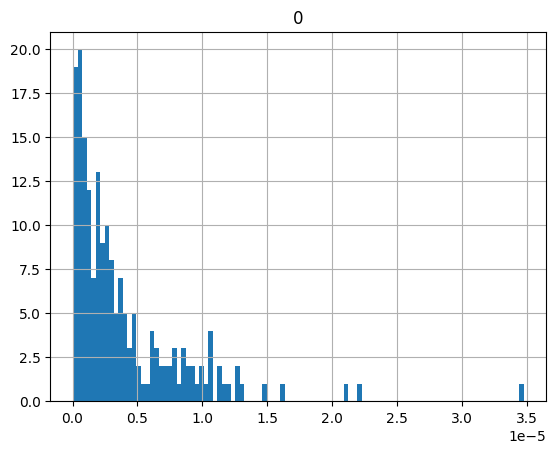

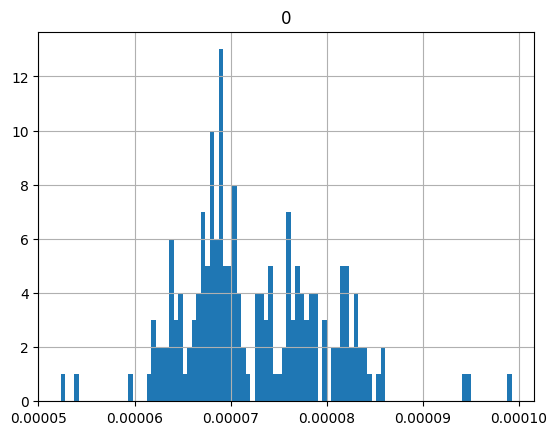

In [30]:
print_obj = 23
birth, death, dim = diagrams[print_obj, :, 0], diagrams[print_obj, :, 1], diagrams[print_obj, :, 2]
life = death - birth

birth, death, dim = birth[life > 0], death[life > 0], dim[life > 0]
bd2 = (birth + death) / 2.0
life = death - birth
print(life.shape)

import pandas
import matplotlib.pyplot as plt

life_hist = pandas.DataFrame(life.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/life.svg")

bd2_hist = pandas.DataFrame(bd2.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/bd2.svg")

#### Betti

In [81]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

betti = gtda.diagrams.BettiCurve()
betti_curves = betti.fit_transform(diagrams)
betti_fig = betti.plot(betti_curves, sample = 787)
betti_fig.update_layout(width = 1000, height = 1000)
display(betti_fig)
betti_fig.write_image(file = f"features/betti.svg", format = "svg")

In [80]:
derivative = gtda.curves.Derivative()
betti_der = derivative.fit_transform(betti_curves)
betti_der_fig = betti.plot(betti_der, sample = 787)
betti_der_fig.update_layout(width = 1000, height = 1000)
display(betti_der_fig)
betti_der_fig.write_image(file = f"features/betti_der.svg", format = "svg")

#### Landscape

In [82]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

landscape = gtda.diagrams.PersistenceLandscape(n_layers = 3)
landscapes = landscape.fit_transform(diagrams)
landscape_fig = landscape.plot(landscapes, sample = 787)
landscape_fig.update_layout(width = 1000, height = 1000)
display(landscape_fig)
landscape_fig.write_image(file = f"features/landscape.svg", format = "svg")

#### Silhouette

In [83]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

silhouette = gtda.diagrams.Silhouette(power = 1)
silhouettes = silhouette.fit_transform(diagrams)
silhouette_fig = silhouette.plot(silhouettes, sample = 794)
silhouette_fig.update_layout(width = 1000, height = 1000)
display(silhouette_fig)
silhouette_fig.write_image(file = f"features/silhouette.svg", format = "svg")

### IV

In [131]:
import numpy
import pandas
import matplotlib.pyplot as plt

def process_iv(subj: str):
    IV = pandas.read_csv(f"../{subj}/exp_final/IV.csv").drop(columns = [ 'Unnamed: 0' ])
    IV[["Source", "Algorithm", "Dimension", "Stat"]] = IV['Feature'].str.split(' ', expand = True)
    IV = IV.sort_values(by = 'internal', ascending = False)
    IV.to_csv(f"../{subj}/exp_final/IV-processed.csv")
    return IV

def analyze_channels_iv(IV: pandas.DataFrame):
    stats = numpy.zeros(40)
    counts = numpy.zeros(40)
    IV["avg"] = (IV["true"] + IV["internal"] + IV["external"]) / 3
    for i, row in IV.sort_values(by = 'avg', ascending = False).reset_index().iterrows():
        if not row['Source'].startswith('channel'):
            continue
        num = int(row['Source'][8:])
        stats[num] += i
        counts[num] += 1
    print(numpy.argsort(stats / counts))
    fig, ax = plt.subplots(1, 1, figsize = (10, 2))
    ax.plot(numpy.sort(stats / counts)[::-1], marker='o')
    return IV[["Feature", "avg"]]

[12  6 11  7 16 32 26 31 27 17 34 21  1 30 33  0 13 10 25  9 18  8 35 37
 15 14 39 38 29  5 36  3  2 20 19 22  4 23 28 24]


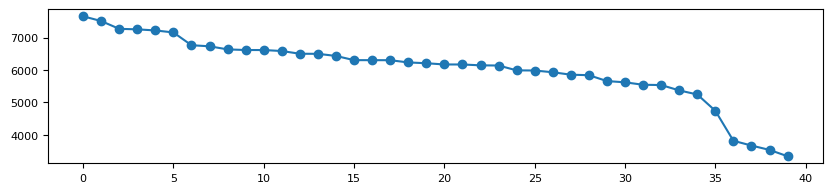

In [132]:
v1 = analyze_channels_iv(process_iv("Subj1"))

[ 0  2  5  4 24  6 11 28  1 18 13 29 16 23  9 10 30 27  3 21 14 26 31  8
  7 12 34 22 33 32 36 15 39 37 35 20 38 25 19 17]


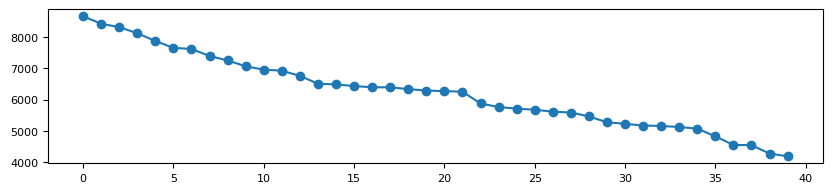

In [133]:
v2 = analyze_channels_iv(process_iv("Subj2"))

[ 4  0 28  3 22  2 11  7  9 30 18 16 14 24 34 39  6  1 10 35 38  5 36 12
 19 17 37 27 23 20 25 21 29 33 31 32 15  8 26 13]


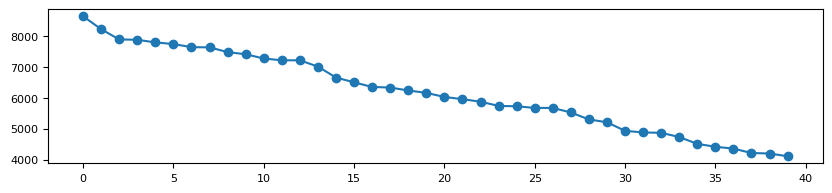

In [134]:
v3 = analyze_channels_iv(process_iv("Subj3"))

[ 6 11  0  7 12  4  2 28 16  3 18 30  9  1 22  5 24 34 27 10 14 35 32 31
 26 39 29 17 13 21 36 23 38 37 33  8 25 15 19 20]


,Feature,avg
2718,channel-12 bd2 dim-1 norm-2,1.254211
2707,channel-12 bd2 all norm-2,1.246412
2497,channel-11 bd2 all norm-2,1.499369
2508,channel-11 bd2 dim-1 norm-2,1.545441
2501,channel-11 bd2 dim-1 sum,1.417397
...,...,...
9683,dissim-2 life dim-5 mean,0.013510
9682,dissim-2 life dim-5 max,0.013068
9673,dissim-2 life dim-4 std,0.008380
9667,dissim-2 life dim-3 kurtosis,0.016218


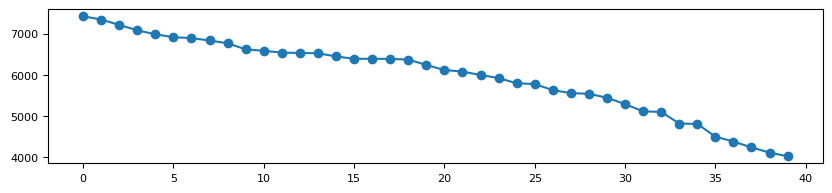

In [135]:
v = pandas.concat([ v1, v2, v3 ], axis = 1)
v.columns = [ "Feature", "true", "-", "internal", "-", "external" ]
v[["Source", "Algorithm", "Dimension", "Stat"]] = v['Feature'].str.split(' ', expand = True)
analyze_channels_iv(v)

In [179]:
BY = 'Algorithm'
sum = { }
counts = { }
for i, row in v.sort_values(by = 'avg', ascending = False).reset_index().iterrows():
    if not row[BY]:
        continue
    if row[BY] not in sum:
        sum[row[BY]] = 0
        counts[row[BY]] = 0
    sum[row[BY]] += i
    counts[row[BY]] += 1
algorithms = [ ]
for algorithm in sum:
    algorithms.append({ 'name': algorithm, 'value': sum[algorithm] / (counts[algorithm] * 1000), 'sum': sum[algorithm], 'count': counts[algorithm] })
df = pandas.DataFrame(algorithms)
df.sort_values(by = 'value', ascending = True)

,name,value,sum,count
1,amplitude-wasserstein-1,6.717628,2236970,333
3,amplitude-betti-1,6.905559,2299551,333
9,amplitude-silhouette-1-1,7.072459,2355129,333
4,amplitude-wasserstein-2,7.080736,2357885,333
7,amplitude-landscape-1-2,7.155505,2382783,333
6,amplitude-landscape-1-1,7.204039,2398945,333
5,amplitude-landscape-2-2,7.208063,2400285,333
8,amplitude-landscape-2-1,7.282087,2424935,333
12,amplitude-silhouette-1-2,7.351976,2448208,333
16,amplitude-silhouette-2-1,7.370180,2454270,333


: 

### Sensors

Reading d:\HSE\year-3\HSE\CourseProject\report\..\Subj3\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1180 matching events found
No baseline correction applied
0 projection items activated


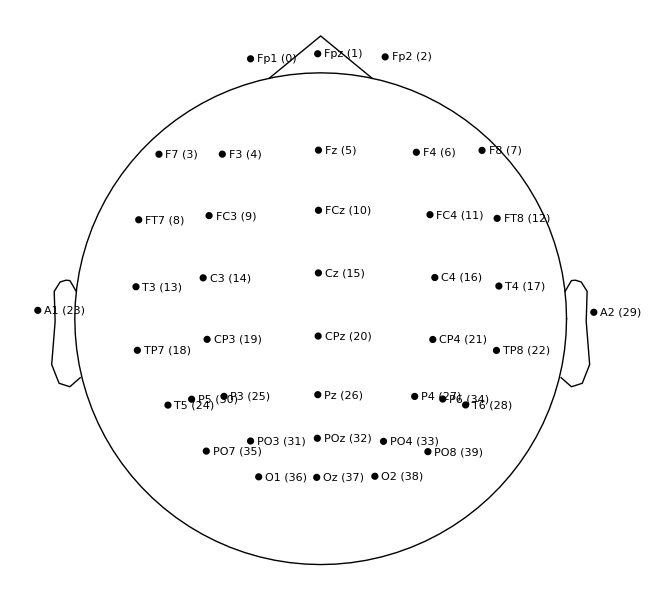

In [91]:
import mne
epochs = mne.read_epochs(f"../Subj3/src/epochs_filt_rr-epo.fif")
epochs.rename_channels({ name: f'{name} ({i})' for i, name in enumerate(epochs.ch_names) })

import matplotlib
matplotlib.rcParams.update({'font.size': 8})
fig = mne.viz.plot_sensors(epochs.info, 'topomap', show_names = True, pointsize = 10)
fig.savefig(f"regions/regions.svg")
fig.savefig(f"regions/regions.png")